# Regressão(11) - Pense Estatística, 2º Edição.

## Universidade Federal de Alagoas - UFAL
## Centro de Tecnologia - CTEC
## Programa de Pós-Graduação Recursos Hídricos e Saneamento - PPGRHS
### Disciplina de Estatística

Clebson Farias

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

In [2]:
#Dados Manso
dados = pd.read_csv("manso.csv", index_col=0, parse_dates=True)
evap = pd.read_csv("evaporacao.csv", sep=';', index_col="Data", parse_dates=True, dayfirst=True)["Evaporacao Piche"].rename("Evap_CUIABA")
evap1 = pd.read_csv("evaporacao2.csv", sep=';', index_col="Data", parse_dates=True, dayfirst=True)["Evaporacao Piche"].rename("Evap_RICAR")
evap2 = pd.read_csv("evaporacao3.csv", sep=';', index_col="Data", parse_dates=True, dayfirst=True)["Evaporacao Piche"].rename("Evap_DIAM")
dados = dados.combine_first(pd.DataFrame(evap))
dados = dados.combine_first(pd.DataFrame(evap1))
dados = dados.combine_first(pd.DataFrame(evap2))
date_start = pd.to_datetime("01/01/1982", dayfirst=True)
date_end = pd.to_datetime("31/12/1986", dayfirst=True)
dados = dados.loc[date_start:date_end]
dados.rename(index=str, 
             columns={"1455008": "COIMBRA_P", "66210000": "MANSO_JUS", "66231000": "COIMBRA_F"}, 
             inplace=True)
dados.index = pd.to_datetime(dados.index, errors='coerce')
dados.head()

,COIMBRA_P,MANSO_JUS,COIMBRA_F,Evap_CUIABA,Evap_DIAM,Evap_RICAR,MANSO
1982-01-01,0.0,NaN,248.865,2.3,1.2,NaN,243.0
1982-01-02,0.0,NaN,333.847,1.3,0.4,NaN,329.0
1982-01-03,0.0,NaN,295.620,2.9,1.1,NaN,290.0
1982-01-04,0.0,NaN,305.919,1.7,0.9,NaN,300.0
1982-01-05,0.0,NaN,387.954,3.7,1.9,NaN,386.0


In [3]:
dados_chuva = pd.Series(dados["COIMBRA_P"].groupby(pd.Grouper(freq='M')).sum(), name='Prec')
dados_vazao_obs = pd.Series(dados["COIMBRA_F"].groupby(pd.Grouper(freq='M')).mean(), name='Obs') 
dados_vazao_nat = pd.Series(dados["MANSO"].groupby(pd.Grouper(freq='M')).mean(), name='Nat')
dados_evap = pd.Series(dados["Evap_CUIABA"].groupby(pd.Grouper(freq='M')).sum())
dados_month = pd.DataFrame([dados_vazao_obs, dados_vazao_nat, dados_chuva, dados_evap]).T
dados_month.head()

,Obs,Nat,Prec,Evap_CUIABA
1982-01-31,399.868226,396.516129,195.2,83.3
1982-02-28,424.485036,435.642857,156.2,76.0
1982-03-31,394.772968,399.838710,78.6,76.9
1982-04-30,292.312400,293.500000,79.0,116.4
1982-05-31,142.554806,141.000000,0.0,110.4


## Regressão

**O objetivo da análise de regressão é descrever a relação entre um conjunto de variáveis**, **variáveis dependentes**, e outro conjunto de variáveis, **variáveis independentes/explicativas**.

Se a relação entre a variável dependente e explanatória é linear, isto é, regressão linear.

\begin{equation}
    y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \epsilon
\end{equation}

onde,

- $x_{1}$ and $x_{2}$ = Variable Explanatory
- y = Variable Dependent
- $\beta_{0}$ = Intercept
- $\beta_{1}$ and $\beta_{2}$  = Parameter associated
- $\epsilon$ = Residual

Dada uma sequência de valores para y e sequência para $x_{1}$ and $x_{2}$, **podemos encontrar os parâmetros**, $\beta_{0}$, $\beta_{1}$, and $\beta_{2}$, que minimiza a soma **$ε^{2}$**. Este processo pe chamado de **mínimos quadrados ordinários**.

## StatsModels

- **StatsModels**, um pacote Python que fornece várias formas de regressão e outras análises. 

In [4]:
import statsmodels.formula.api as smf
formula = "Obs ~ Nat"
model = smf.ols(formula, data=dados_month)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Obs   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     9345.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           8.60e-66
Time:                        16:32:06   Log-Likelihood:                -216.49
No. Observations:                  60   AIC:                             437.0
Df Residuals:                      58   BIC:                             441.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6086      2.241      0.718      0.476      -2.877       6.094
Nat            0.9930      0.010     96.669      0.000       0.972       1.014
==============================================================================
Omnibus:                       49.089   Durbin-Watson:                   1.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.418
Skew:                           2.000   Prob(JB):                     1.33e-76
Kurtosis:                      14.125   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
inter = results.params['Intercept']
slope = results.params['Nat']
print('Inter: ', inter, '\nSlope: ', slope)

Inter:  1.6085535341582107 
Slope:  0.9930393807912127


\begin{equation}
    y = 1.6086 + 0.99304 · x_{1} + \epsilon
\end{equation}

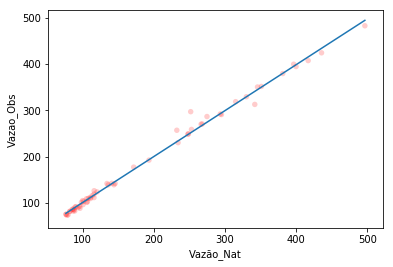

<Figure size 576x432 with 0 Axes>

In [6]:
fit_xs, fit_ys = thinkstats2.FitLine(dados_month["Nat"], inter, slope)
plt.plot(fit_xs, fit_ys)
thinkplot.Scatter(dados_month["Nat"], dados_month["Obs"], color='red')
thinkplot.Show(xlabel='Vazão_Nat', ylabel='Vazao_Obs', legend=False)

In [7]:
slope_pvalue = results.pvalues['Nat']
slope_pvalue

8.600756103710291e-66

In [8]:
r2 = results.rsquared
r2

0.9938316585587954

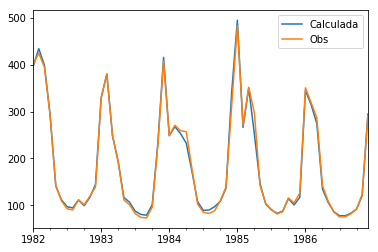

In [9]:
def predicao(df, param):
    fit_ys = param[0] + param[1] * df.Nat
    return fit_ys.rename("Calculada")

Q_obs = predicao(dados_month, [inter, slope])
Q_obs.plot(legend=True)
dados_month.Obs.plot(legend=True)

## Regressões Multiplas

Podemos ajustar um único modelo que inclui **duas variáveis**. Com a fórmula **MANSO ~ COIMBRA_F + COIMBRA_P**, obtemos:

In [10]:
formula = "Nat ~ Obs + Prec"
model = smf.ols(formula, data=dados_month)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Nat   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     4593.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           1.04e-63
Time:                        16:32:07   Log-Likelihood:                -216.72
No. Observations:                  60   AIC:                             439.4
Df Residuals:                      57   BIC:                             445.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4414      2.290     -0.193      0.848      -5.027       4.144
Obs            1.0015      0.013     76.962      0.000       0.975       1.028
Prec          -0.0014      0.015     -0.094      0.925      -0.032       0.029
==============================================================================
Omnibus:                       46.109   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.953
Skew:                          -1.824   Prob(JB):                     3.71e-72
Kurtosis:                      13.875   Cond. No.                         489.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
inter = results.params['Intercept']
slope1 = results.params['Obs']
slope2 = results.params['Prec']
print('Inter: ', inter, '\nSlope1: ', slope1, '\nSlope2: ', slope2)

Inter:  -0.4413975226150768 
Slope1:  1.0015274341139355 
Slope2:  -0.0014457054647695096


\begin{equation}
    y(x_{1}, x_{2}) = -0,4414 + 1,00153 · x_{1} - 0,0145 · x_{2} + \epsilon
\end{equation}

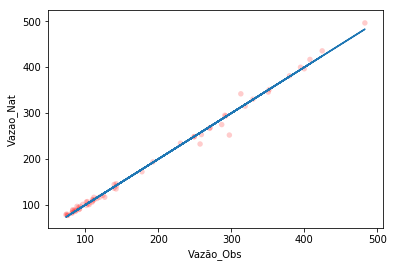

<Figure size 576x432 with 0 Axes>

In [12]:
def FitLine2(xs, xs2, inter, slope, slope2):
    #fit_xs = np.sort(xs)
    #fit_xs2 = np.sort(xs2)
    fit_ys = inter + slope * xs + slope2 * xs2
    return xs, fit_ys

fit_xs, fit_ys = FitLine2(dados_month["Obs"], dados_month["Prec"], inter, slope1, slope2)
plt.plot(fit_xs, fit_ys)
thinkplot.Scatter(dados_month["Obs"], dados_month["Nat"], color='red')
thinkplot.Show(xlabel='Vazão_Obs', ylabel='Vazao_Nat', legend=False)

In [13]:
slope1_pvalue = results.pvalues['Obs']
slope2_pvalue = results.pvalues['Prec']
print('p-Value (Slope1): ', slope1_pvalue, '\np-Value (Slope2): ', slope2_pvalue) 

p-Value (Slope1):  2.6931034254474936e-59 
p-Value (Slope2):  0.9254731592105461


In [14]:
r2 = results.rsquared
r2

0.9938326137285051

Podemos ajustar um único modelo que inclui três variáveis. Com a fórmula **MANSO ~ COIMBRA_F + COIMBRA_P + EVAPORAÇÃO**, obtemos:

In [15]:
formula = "Obs ~ Nat + Prec + Evap_CUIABA"
model = smf.ols(formula, data=dados_month)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Obs   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     3547.
Date:                Thu, 13 Jun 2019   Prob (F-statistic):           8.14e-64
Time:                        16:32:08   Log-Likelihood:                -211.57
No. Observations:                  60   AIC:                             431.1
Df Residuals:                      56   BIC:                             439.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      24.3639      7.664      3.179      0.002       9.012      39.716
Nat             0.9618      0.015     64.904      0.000       0.932       0.992
Prec            0.0039      0.014      0.274      0.785      -0.025       0.033
Evap_CUIABA    -0.1443      0.046     -3.107      0.003      -0.237      -0.051
==============================================================================
Omnibus:                       36.683   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.910
Skew:                           1.362   Prob(JB):                     1.96e-50
Kurtosis:                      12.173   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
inter = results.params['Intercept']
slope1 = results.params['Nat']
slope2 = results.params['Prec']
slope3 = results.params['Evap_CUIABA']
print('Inter: ', inter, '\nSlope1: ', slope1, '\nSlope2: ', slope2, '\nSlope3: ', slope3)

Inter:  24.363915114364495 
Slope1:  0.9618295437310675 
Slope2:  0.003911896297715045 
Slope3:  -0.1442717574094482


\begin{equation}
    y(x_{1}, x_{2}, x_{3}) = 24,3639 + 0,96183 · x_{1} + 0,003912 · x_{2} - 0.1443 · x_{3} + \epsilon
\end{equation}

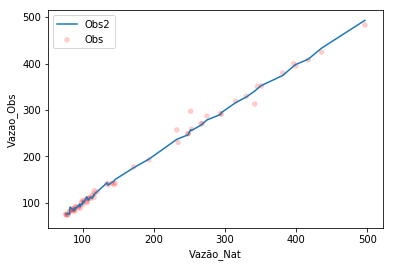

<Figure size 576x432 with 0 Axes>

In [17]:
fit = pd.DataFrame(results.predict(dados_month), columns=['Obs2'])
dados_month = dados_month.combine_first(fit)

dados_month = dados_month.sort_values(by='Nat')
plt.plot(dados_month['Nat'], dados_month['Obs2'])
thinkplot.Scatter(dados_month["Nat"], dados_month["Obs"], color='red')
thinkplot.Show(xlabel='Vazão_Nat', ylabel='Vazao_Obs', legend=True)

In [18]:
slope1_pvalue = results.pvalues['Nat']
slope2_pvalue = results.pvalues['Prec']
slope3_pvalue = results.pvalues['Evap_CUIABA']
print('p-Value (Slope1): ', slope1_pvalue, 
      '\np-Value (Slope2): ', slope2_pvalue, 
      '\np-Value (Slope3): ', slope3_pvalue) 

p-Value (Slope1):  2.1378819956410238e-54 
p-Value (Slope2):  0.7851071371247828 
p-Value (Slope3):  0.002968180027950839


In [19]:
r2 = results.rsquared
r2

0.9947647765506302

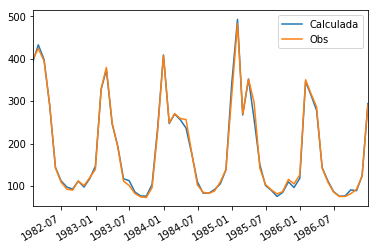

In [20]:
def predicao(df, param):
    fit_ys = param[0] + param[1] * df.Nat + param[2] * df.Prec + param[3] * df.Evap_CUIABA
    return fit_ys.rename("Calculada")

Q_obs = predicao(dados_month, [inter, slope1, slope2, slope3])
Q_obs.plot(legend=True)
dados_month.Obs.plot(legend=True)

## Exploração dos dados

Um dos problema importante na análise de regressão é **selecionar os conjutos de variáveis independentes** a ser usado no modelo;

Selecionar um conjutos apropriados de regressores;

Filtrar os dados para obter os melhores regressores;

Usar o menor número de regressores possível, fazendo o modelo obter o custo mínimo de manuntenção;

**Método**
- Calcular p valor de $R^2$ para todas as variáveis;
- Verifica quais variáveis tem uma variabilidade;
- Observa se o conjunto de dados apresenta falhas;

## Previsão

Usando dados diários:

In [21]:
formula = "COIMBRA_F ~ MANSO + COIMBRA_P + Evap_CUIABA"
model = smf.ols(formula, data=dados)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              COIMBRA_F   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.730e+04
Date:                Thu, 13 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:32:08   Log-Likelihood:                -8231.5
No. Observations:                1826   AIC:                         1.647e+04
Df Residuals:                    1822   BIC:                         1.649e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.5797      1.399     12.566      0.000      14.836      20.324
MANSO           0.9388      0.004    260.805      0.000       0.932       0.946
COIMBRA_P       0.2083      0.055      3.771      0.000       0.100       0.317
Evap_CUIABA    -1.6915      0.239     -7.076      0.000      -2.160      -1.223
==============================================================================
Omnibus:                      869.812   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37396.526
Skew:                           1.519   Prob(JB):                         0.00
Kurtosis:                      24.961   Cond. No.                         663.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
inter = results.params['Intercept']
slope1 = results.params['MANSO']
slope2 = results.params['COIMBRA_P']
slope3 = results.params['Evap_CUIABA']
print('Inter: ', inter, '\nSlope1: ', slope1, '\nSlope2: ', slope2, '\nSlope3: ', slope3)

Inter:  17.579689802129074 
Slope1:  0.9387709458209541 
Slope2:  0.20826540374814656 
Slope3:  -1.6915454569330144


\begin{equation}
    y(x_{1}, x_{2}, x_{3}) = 17,5797 + 0,9388 · x_{1} + 0,2083 · x_{2} - 1,69155 · x_{3} + \epsilon
\end{equation}

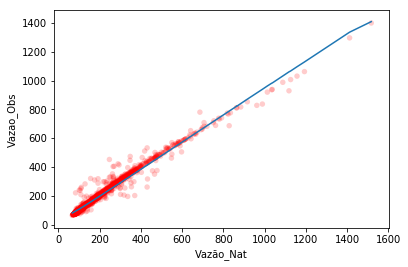

<Figure size 576x432 with 0 Axes>

In [23]:
def FitLine2(xs, xs2, xs3, inter, slope, slope2, slope3):
    fit_xs = np.sort(xs)
    fit_xs2 = np.sort(xs2)
    fit_xs3 = np.sort(xs3)
    fit_ys = inter + slope * fit_xs + slope2 * fit_xs2 + slope3 * fit_xs3
    return fit_xs, fit_ys

fit_xs, fit_ys = FitLine2(dados["MANSO"], dados["COIMBRA_P"], dados["Evap_CUIABA"], inter, slope1, slope2, slope3)
plt.plot(fit_xs, fit_ys)
thinkplot.Scatter(dados["MANSO"], dados["COIMBRA_F"], color='red')
thinkplot.Show(xlabel='Vazão_Nat', ylabel='Vazao_Obs', legend=False)

In [24]:
slope1_pvalue = results.pvalues['MANSO']
slope2_pvalue = results.pvalues['COIMBRA_P']
slope3_pvalue = results.pvalues['Evap_CUIABA']
print('p-Value (Slope1): ', slope1_pvalue, 
      '\np-Value (Slope2): ', slope2_pvalue, 
      '\np-Value (Slope3): ', slope3_pvalue) 

p-Value (Slope1):  0.0 
p-Value (Slope2):  0.00016775475717749949 
p-Value (Slope3):  2.1056320912247925e-12


In [25]:
r2 = results.rsquared
r2

0.9782404413408452

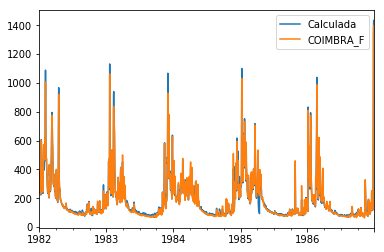

In [26]:
def predicao(df, param):
    fit_ys = param[0] + param[1] * df.MANSO + param[2] * df.COIMBRA_P + param[3] * df.Evap_CUIABA
    return fit_ys.rename("Calculada")

Q_obs = predicao(dados, [inter, slope1, slope2, slope3])
Q_obs.plot(legend=True)
dados.COIMBRA_F.plot(legend=True)

Fazer gráfico de diferença;

## Regressão logística

A **regressão linear** pode ser generalizada para lidar com outros **tipos de variáveis dependentes**.
- **Regressão logística**: Variável dependente for booleana
- **Regressão de Poisson**: Variável dependente é uma contagem inteira

Variáveis **qualitativas** ou **indicativas**;

## Estimação de parâmetros

- A regrassão logística não tem uma **solução fechada**;
- Precisa ser resolvida **iterativamente**;


Ver exemplo para aplicação de regressão logística para a hidrologia

## Precisão

- Numero de previsões de sucesso, comparado com que esperaríamos por acaso;


In [27]:
predict = results.predict()
sum_pre = predict.sum()
sum_re = dados["COIMBRA_F"].sum()

In [28]:
acc = abs((sum_pre-sum_re)/len(dados))
acc

1.9126285075619082e-13